In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib
import splitfolders

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
base_ds = 'Leaves1'
base_ds = pathlib.Path(base_ds)

In [3]:
splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 1970 files [00:21, 93.46 files/s] 


In [4]:
Black_Measles= [fn for fn in os.listdir(f'{base_ds}/0') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
Black_rot= [fn for fn in os.listdir(f'{base_ds}/1') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
Leaf_blight= [fn for fn in os.listdir(f'{base_ds}/2') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
healthy= [fn for fn in os.listdir(f'{base_ds}/3') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h4= [fn for fn in os.listdir(f'{base_ds}/4') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h5= [fn for fn in os.listdir(f'{base_ds}/5') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h6= [fn for fn in os.listdir(f'{base_ds}/6') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h7= [fn for fn in os.listdir(f'{base_ds}/7') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h8= [fn for fn in os.listdir(f'{base_ds}/8') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h9= [fn for fn in os.listdir(f'{base_ds}/9') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h10= [fn for fn in os.listdir(f'{base_ds}/10') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h11= [fn for fn in os.listdir(f'{base_ds}/11') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h12= [fn for fn in os.listdir(f'{base_ds}/12') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h13= [fn for fn in os.listdir(f'{base_ds}/13') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h14= [fn for fn in os.listdir(f'{base_ds}/14') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h15= [fn for fn in os.listdir(f'{base_ds}/15') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
h16= [fn for fn in os.listdir(f'{base_ds}/16') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
#Phoma= [fn for fn in os.listdir(f'{base_ds}/Phoma') if (fn.endswith('.jpg') or fn.endswith('.jpeg'))]
coffee= [Black_Measles,Black_rot,Leaf_blight,healthy ,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16]
coffee_classes = []
for i in os.listdir('imgs/train'):
    coffee_classes+=[i]
coffee_classes.sort()

In [5]:
image_count1= len(list(base_ds.glob('*/*.jpg')))
image_count2 = len(list(base_ds.glob('*/*.jpeg')))
image_count=image_count1+image_count2
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(coffee_classes)}')
# count = 0
# coffee_count = []
# for x in coffee_classes:
#   print(f'Total {x} images: {len(coffee_count)}')
#   coffee_count.append(len(coffee_count))
#   count+=1

# sns.set_style('darkgrid')
# sns.barplot(x=coffee_classes, y=coffee_count, palette="Blues_d")
# plt.show()

Total images: 1970
Total number of classes: 33


In [6]:
def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in coffee_classes:
    i+=1
    plt.subplot(1,33, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

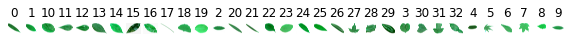

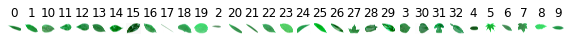

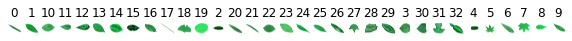

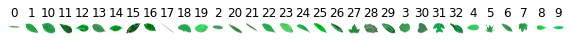

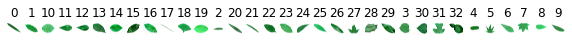

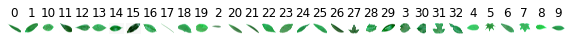

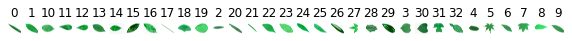

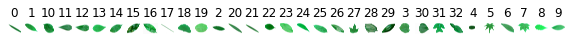

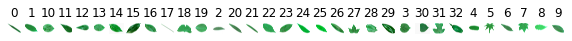

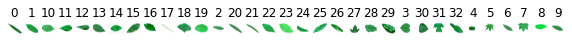

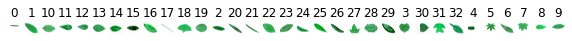

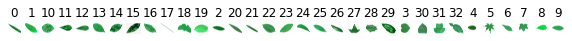

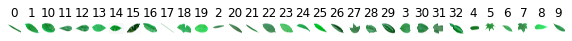

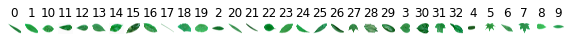

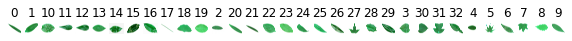

In [7]:
for i in range(15):
  load_random_img(base_ds,coffee_classes)

In [8]:
batch_size =100
img_height, img_width =128,128
input_shape = (img_height, img_width, 3)

CONFIG=dict(
            batch_size =100,
            img_height=128,
            img_width =128,
            )

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                               rotation_range=30,
                               zoom_range=0.15,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.15,
                               horizontal_flip=True,
                               fill_mode="nearest")

test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical',
    shuffle=True
    )

val_ds = train_datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = test_datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1367 images belonging to 33 classes.
Found 278 images belonging to 33 classes.
Found 325 images belonging to 33 classes.


In [13]:

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import CSVLogger 


In [14]:
img_width, img_height = 224, 224

train_data_dir = 'imgs/train'
validation_data_dir = 'imgs/val'
nb_train_samples = 1367
nb_validation_samples = 278
epochs = 100
batch_size = 64

In [15]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [21]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 
model.add(Conv2D(64, (5, 5))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.7)) 
model.add(Flatten()) 
model.add(Dense(1000)) 
model.add(Activation('relu')) 
model.add(Dropout(0.7)) 
model.add(Dense(33, activation='softmax')) 
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 activation_6 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 activation_7 (Activation)   (None, 106, 106, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [23]:
#data augmentation for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

#data augmentation for testing:
valid_datagen = ImageDataGenerator(rescale=1. / 255)

#take path to dir and generate batches of augmented data
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical')

csv_logger = CSVLogger('leaf_v1-1.csv');

Found 1367 images belonging to 33 classes.
Found 278 images belonging to 33 classes.


In [24]:
best_model_file = "leafnet.h5" 
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True) 
print('Training model...') 
results = model.fit(train_generator,steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, batch_size=64, validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=[best_model]) 



Training model...
Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 4.2895 - accuracy: 0.0414
Epoch 1: val_loss improved from inf to 3.34588, saving model to leafnet.h5
21/21 [==============================] - 154s 7s/step - loss: 4.2895 - accuracy: 0.0414 - val_loss: 3.3459 - val_accuracy: 0.1250
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 3.1053 - accuracy: 0.1427
Epoch 2: val_loss improved from 3.34588 to 2.39087, saving model to leafnet.h5
21/21 [==============================] - 144s 7s/step - loss: 3.1053 - accuracy: 0.1427 - val_loss: 2.3909 - val_accuracy: 0.3867
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 2.5346 - accuracy: 0.2847
Epoch 3: val_loss improved from 2.39087 to 1.83621, saving model to leafnet.h5
21/21 [==============================] - 146s 7s/step - loss: 2.5346 - accuracy: 0.2847 - val_loss: 1.8362 - val_accuracy: 0.5000
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 2.186

Epoch 29/100
21/21 [==============================] - ETA: 0s - loss: 0.4354 - accuracy: 0.8480
Epoch 29: val_loss did not improve from 0.33989
21/21 [==============================] - 124s 6s/step - loss: 0.4354 - accuracy: 0.8480 - val_loss: 0.4203 - val_accuracy: 0.8750
Epoch 30/100
21/21 [==============================] - ETA: 0s - loss: 0.4303 - accuracy: 0.8519
Epoch 30: val_loss did not improve from 0.33989
21/21 [==============================] - 137s 6s/step - loss: 0.4303 - accuracy: 0.8519 - val_loss: 0.4235 - val_accuracy: 0.8711
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 0.3931 - accuracy: 0.8488
Epoch 31: val_loss did not improve from 0.33989
21/21 [==============================] - 135s 6s/step - loss: 0.3931 - accuracy: 0.8488 - val_loss: 0.3714 - val_accuracy: 0.8672
Epoch 32/100
21/21 [==============================] - ETA: 0s - loss: 0.4164 - accuracy: 0.8419
Epoch 32: val_loss did not improve from 0.33989
21/21 [===========================

Epoch 88/100
21/21 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9309
Epoch 88: val_loss did not improve from 0.20713
21/21 [==============================] - 119s 6s/step - loss: 0.1555 - accuracy: 0.9309 - val_loss: 0.2127 - val_accuracy: 0.9258
Epoch 89/100
21/21 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9294
Epoch 89: val_loss did not improve from 0.20713
21/21 [==============================] - 123s 6s/step - loss: 0.1560 - accuracy: 0.9294 - val_loss: 0.2963 - val_accuracy: 0.8984
Epoch 90/100
21/21 [==============================] - ETA: 0s - loss: 0.1625 - accuracy: 0.9353
Epoch 90: val_loss did not improve from 0.20713
21/21 [==============================] - 125s 6s/step - loss: 0.1625 - accuracy: 0.9353 - val_loss: 0.2150 - val_accuracy: 0.9258
Epoch 91/100
21/21 [==============================] - ETA: 0s - loss: 0.1377 - accuracy: 0.9417
Epoch 91: val_loss did not improve from 0.20713
21/21 [===========================

In [ ]:
# #model training
# model.fit(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size,
#     callbacks=[csv_logger])

In [25]:
from keras.models import load_model

In [26]:
print('Training finished.') 
print('Loading the best model...') 
model = load_model('leafnet.h5') 
print('Best Model loaded!')

Training finished.
Loading the best model...
Best Model loaded!


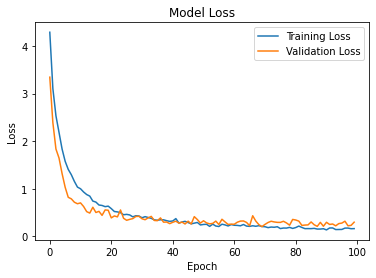

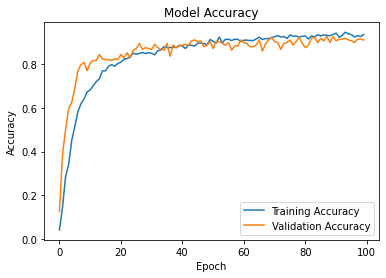

In [27]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training accuracy and validation accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [28]:
import numpy as np

# After training, use the model to make predictions on test data
predictions = model.predict(validation_generator)

# Define a dictionary to map class indices to class names
class_labels = {
    0: 'pubescent bamboo',
    1: 'Chinese horse chestnut',
    2: 'Anhui Barberry',
    3: 'Chinese redbud',
    4: 'true indigo',
    5: 'Japanese maple',
    6: 'Nanmu',
    7: 'castor aralia',
    8: 'Chinese cinnamon',
    9: 'goldenrain tree',
    10: 'Big-fruited Holly',
    11: 'Japanese cheesewood',
    12: 'wintersweet',
    13: 'camphortree',
    14: 'Japan Arrowwood',
    15: 'sweet osmanthus',
    16: 'deodar',
    17: 'ginkgo',
    18: 'maidenhair tree',
    19: 'Crape myrtle,Crepe myrtle',
    20: 'oleander',
    21: 'yew plum pine',
    22: 'Japanese Flowering Cherry',
    23: 'Glossy Privet',
    24: 'Chinese Toon',
    25: 'peach',
    26: 'Ford Woodlotus',
    27: 'trident maple',
    28: 'Beales barberry',
    29: 'southern magnolia',
    30: 'Canadian poplar',
    31: 'Chinese tulip tree',
    32: 'tangerine',

}

# Loop through the predictions and print the results with class names
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    probability = prediction[predicted_class_index]
    
    print(f"Image {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")


5/5 [==============================] - 28s 5s/step
Image 1: Predicted Class: Glossy Privet, Probability: 0.9758
Image 2: Predicted Class: goldenrain tree, Probability: 1.0000
Image 3: Predicted Class: southern magnolia, Probability: 0.9934
Image 4: Predicted Class: peach, Probability: 1.0000
Image 5: Predicted Class: ginkgo, Probability: 0.9520
Image 6: Predicted Class: castor aralia, Probability: 0.9999
Image 7: Predicted Class: southern magnolia, Probability: 0.9887
Image 8: Predicted Class: Japan Arrowwood, Probability: 0.9022
Image 9: Predicted Class: pubescent bamboo, Probability: 0.9996
Image 10: Predicted Class: Glossy Privet, Probability: 0.9999
Image 11: Predicted Class: camphortree, Probability: 0.9976
Image 12: Predicted Class: Crape myrtle,Crepe myrtle, Probability: 0.9835
Image 13: Predicted Class: Chinese horse chestnut, Probability: 1.0000
Image 14: Predicted Class: Chinese Toon, Probability: 0.9966
Image 15: Predicted Class: Glossy Privet, Probability: 0.9998
Image 16: 

1/1 [==============================] - 0s 474ms/step
Predicted Class: Chinese redbud, Probability: 1.0000


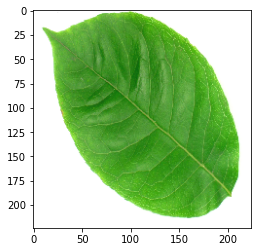

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Replace 'image_path' with the path to your single image
image_path = "standardleaves\\11.jpg"

# Load the image
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)

img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)


# Make predictions for the single image
predictions = model.predict(img)

# Define a dictionary to map class indices to class names starting from index 1
class_labels = {
    0: 'pubescent bamboo',
    1: 'Chinese horse chestnut',
    2: 'Anhui Barberry',
    3: 'Chinese redbud',
    4: 'true indigo',
    5: 'Japanese maple',
    6: 'Nanmu',
    7: 'castor aralia',
    8: 'Chinese cinnamon',
    9: 'goldenrain tree',
    10: 'Big-fruited Holly',
    11: 'Japanese cheesewood',
    12: 'wintersweet',
    13: 'camphortree',
    14: 'Japan Arrowwood',
    15: 'sweet osmanthus',
    16: 'deodar',
    17: 'ginkgo',
    18: 'maidenhair tree',
    19: 'Crape myrtle,Crepe myrtle',
    20: 'oleander',
    21: 'yew plum pine',
    22: 'Japanese Flowering Cherry',
    23: 'Glossy Privet',
    24: 'Chinese Toon',
    25: 'peach',
    26: 'Ford Woodlotus',
    27: 'trident maple',
    28: 'Beales barberry',
    29: 'southern magnolia',
    30: 'Canadian poplar',
    31: 'Chinese tulip tree',
    32: 'tangerine',
   
}

# Convert the predicted class index to match the dictionary
predicted_class_index = np.argmax(predictions) + 1
predicted_class = class_labels[predicted_class_index]
probability = predictions[0][predicted_class_index - 1]

print(f"Predicted Class: {predicted_class}, Probability: {probability:.4f}")


In [1]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay